# Errors

1. Beta Error OR Type II error      ( when wrong null hyp. is proved right)
2. Alpha Error OR Type I error      ( when correct null hyp. is provred wrong)


# Annova

1. Annova stands for analysis of variance
2. It is an extension of T test
3. It is performed using F Distribution
4. F Dist depends on the degrees of freedom (helps findinng dfd and dfn)
5. F Dist assumes non negative values  and shape of F dist assumes skewness to the right mmeaning it is +ively skewed.
6. Shape of F Dist assumes skewness to the right meaning it is +ively skewed

stats.f.ppf(q=1-0.05, dfn=2, dfd=12)

In [32]:
import scipy.stats as stats
stats.f.ppf(q=1-0.05, dfn=2, dfd=12)

# q repersents the confidence interval meaning 1-alpha
# dfn = degrees of freedom in numerator
# dfd = defrees of freedom in denominator

3.8852938346523933

# Question 



In [33]:
stats.f.ppf(q=1-0.05, dfn=24, dfd=21)

2.0540043122355685

## Post - Hoc Test

## Question 

Car crash test for pressure on skull

We wish to identify whether the mean pressure applied to the driver during a car crash is same in all segments keeping alpha be 0.05

In [34]:
mean_pressure_hatchback=[643,655,702]
mean_pressure_sedan=[469,427,525]
mean_pressure_suv=[484,456,402]


In [35]:
import pandas as pd
y=["HB","HB","HB"]
x=pd.DataFrame(mean_pressure_hatchback,index=y)
x
y1=["SD","SD","SD"]
x2=pd.DataFrame(mean_pressure_sedan,index=y1)
y2=["SV","SV","SV"]
x3=pd.DataFrame(mean_pressure_suv,index=y2)

In [36]:
y3=y+y1+y2
y3

['HB', 'HB', 'HB', 'SD', 'SD', 'SD', 'SV', 'SV', 'SV']

In [37]:
mean_pressure=mean_pressure_hatchback+mean_pressure_sedan+mean_pressure_suv
mean_pressure

[643, 655, 702, 469, 427, 525, 484, 456, 402]

In [38]:
xx=pd.DataFrame(mean_pressure,index=y3)
xx

,0
HB,643
HB,655
HB,702
SD,469
SD,427
SD,525
SV,484
SV,456
SV,402


In [39]:
xx=xx.reset_index()
xx.rename({"index":"Cars",0:"Pressure"},axis=1,inplace=True)
xx

,Cars,Pressure
0,HB,643
1,HB,655
2,HB,702
3,SD,469
4,SD,427
5,SD,525
6,SV,484
7,SV,456
8,SV,402


In [40]:
# setting up hypothesis :

# H0 : mean pressure on skull (Seadn) = mean pressure on skull (Suv) = mean pressure on skull (HB)
# H1 : mean pressure on skull (HB) != mean pressure on skull (Suv) != mean pressure on skull (Sedan)

In [41]:
# Critical Value

# dfn= 3-1
# dfd=(3-1)+(3-1)+(3-1)

In [42]:
stats.f.ppf(1-0.05, dfn=2, dfd= 6)

5.143252849784718

In [43]:
import statsmodels.api as sms
import statsmodels.formula.api as statsmodels
from statsmodels.formula.api import ols

In [44]:
# Fitting annova model using OLS

model = ols("Pressure~Cars",data=xx).fit()

In [45]:
print(sms.stats.anova_lm(model))

           df        sum_sq       mean_sq          F    PR(>F)
Cars      2.0  86049.555556  43024.777778  25.175411  0.001207
Residual  6.0  10254.000000   1709.000000        NaN       NaN


 Since the F stats in more than the F ctitical value (5.14) and hence it is clear that at leaset one car type has a mean pressure impact
 on the head/skull. hence null hyp. is rejected.

 Since p value is found out to be 0.0012 which is way less than 0.05 (alpha) amd since we reject the H0 and accecpt the H1 and vice versa.

Now, since we know that atleast one car type has a different mean pressure impact on the skull and hence we are interested in knowing which car
type is this and to know this we need to conduct post hoc test and the mostly conducted test is called tukey test.


# Post Hoc Test

In [46]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [47]:
print(pairwise_tukeyhsd(xx["Pressure"],xx["Cars"]))

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    HB     SD    -193.0  0.003 -296.4458  -89.5542   True
    HB     SV -219.3333 0.0015 -322.7791 -115.8876   True
    SD     SV  -26.3333 0.7172 -129.7791   77.1124  False
---------------------------------------------------------


## Conclusion for Post Hoc Test 

We can see that the HB has the maximum mean difference with sedan and suv and we also see that the hyp. rejection is True for these
car segments and hence we can conclude that the HB appears to be the most Vulnerable Segment to go with....

In [48]:
gym_store1=[60,65,66,55,62,70,51,72,58,61,71,41,70,57,55,63,64,76,74,54,58,73]
gym_store2=[56,65,63,57,47,72,56,52,75,66,62,68,75,60,73,63,64,65]
gym_store3=[67,56,65,61,63,59,42,56,63,65,60,57,62,70,73,63,55,52,58,68,70,72,45]

In [49]:
g1=pd.DataFrame({"gym_store":"G1","M_Inc":gym_store1})
g2=pd.DataFrame({"gym_store":"G2","M_Inc":gym_store2})
g3=pd.DataFrame({"gym_store":"G3","M_Inc":gym_store3})

In [50]:
g4=pd.DataFrame()
g4=g4.append(g1)


In [51]:
g4=g4.append(g2)

In [52]:
g4=g4.append(g3)

In [53]:
g4.head()

,gym_store,M_Inc
0,G1,60
1,G1,65
2,G1,66
3,G1,55
4,G1,62


In [54]:
n = 3
dfn = n-1
dfd = len(gym_store1)+len(gym_store2)+len(gym_store3)-n


In [55]:
stats.f.ppf(1-0.05, dfn=dfn, dfd=dfd)

3.1504113105827303

In [56]:
import seaborn as sns

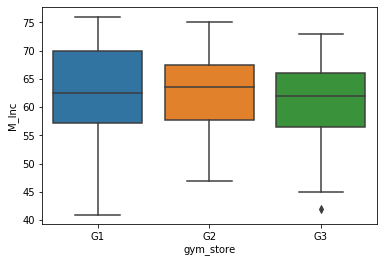

In [57]:
sns.boxplot(x="gym_store",y="M_Inc",data=g4)

In [58]:
model_gym = ols("M_Inc~gym_store",data=g4).fit()

In [59]:
print(sms.stats.anova_lm(model_gym))

             df       sum_sq    mean_sq         F    PR(>F)
gym_store   2.0    59.057187  29.528593  0.444929  0.642967
Residual   60.0  3982.022178  66.367036       NaN       NaN


In [60]:
# Conclusion 

#Since the P value states that there is 61% probality that the GYM income of all the stores is same and the same can be seen my F statistics. Hence
#we Fail to Reject H0.

print(pairwise_tukeyhsd(g4["M_Inc"],g4["gym_store"]))

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    G1     G2   0.7323    0.9 -5.4899 6.9545  False
    G1     G3  -1.5889 0.7709 -7.4273 4.2495  False
    G2     G3  -2.3213 0.6282 -8.4823 3.8398  False
---------------------------------------------------


# Annova Test on Sales mart data

In [61]:
train=pd.read_table("C:\\Users\\Asus\\Downloads\\Train_UWu5bXk.txt",sep=",")    # sep is known as delimitter in SA

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [62]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [63]:
data=train[["Item_Type","Item_Outlet_Sales"]]

In [64]:
data.head()

,Item_Type,Item_Outlet_Sales
0,Dairy,3735.1380
1,Soft Drinks,443.4228
2,Meat,2097.2700
3,Fruits and Vegetables,732.3800
4,Household,994.7052


In [65]:
n = 3
dfn = n-1

dfd = data["Item_Type"].shape[0]


In [66]:
stats.f.ppf(1-0.05, dfn=dfn, dfd=dfd)

2.996785484300511

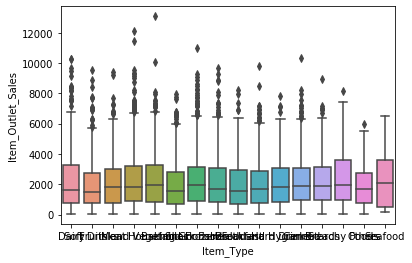

In [67]:
sns.boxplot(x="Item_Type",y="Item_Outlet_Sales",data=data)

In [68]:
model1 = ols("Item_Outlet_Sales~Item_Type",data=data).fit()

In [69]:
print(sms.stats.anova_lm(model1))

               df        sum_sq       mean_sq         F    PR(>F)
Item_Type    15.0  1.176182e+08  7.841211e+06  2.700653  0.000388
Residual   8507.0  2.469965e+10  2.903450e+06       NaN       NaN


In [70]:
print(pairwise_tukeyhsd(data["Item_Outlet_Sales"],data["Item_Type"]))

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                group2         meandiff p-adj    lower      upper   reject
----------------------------------------------------------------------------------------
         Baking Goods                Breads   251.161 0.8108  -183.0066  685.3286  False
         Baking Goods             Breakfast  158.8374    0.9  -443.3791   761.054  False
         Baking Goods                Canned  272.2237 0.2272   -52.0876   596.535  False
         Baking Goods                 Dairy  279.5714 0.1733   -40.7958  599.9386  False
         Baking Goods          Frozen Foods  179.8965 0.7817   -124.193  483.9861  False
         Baking Goods Fruits and Vegetables  336.0384  0.005    52.6461  619.4307   True
         Baking Goods           Hard Drinks  186.2504    0.9   -274.177  646.6778  False
         Baking Goods    Health and Hygiene   57.0291    0.9  -286.7934  400.8515  False
         Baking Goods

In [71]:
Table1 = [["Day","Store-A", "Store-B","Store-C","Store-D","Store-E"],
         [1,79,81,74,77,66],[2,78,86,89,97,86],[3,81,87,84,94,82],[4,80,83,81,88,83],[5,70,74,77,89,68]]

In [72]:
#The Data Comes from an Electronic Store showing the percentage of customers satisfied with the Quality of Service.

# Conduct a two way anova and draw inference about the Population Mean of Service corresponding to the days as well as stores.

In [73]:
type(Table1)

list

In [74]:
import numpy as np
import pandas as pd
np.array(Table1)

array([['Day', 'Store-A', 'Store-B', 'Store-C', 'Store-D', 'Store-E'],
       ['1', '79', '81', '74', '77', '66'],
       ['2', '78', '86', '89', '97', '86'],
       ['3', '81', '87', '84', '94', '82'],
       ['4', '80', '83', '81', '88', '83'],
       ['5', '70', '74', '77', '89', '68']], dtype='<U7')

In [75]:
xyz=pd.DataFrame(Table1,index=Table1[0:]).T

In [76]:
xyz

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
,1,79,81,74,77,66
,2,78,86,89,97,86
,3,81,87,84,94,82
,4,80,83,81,88,83
,5,70,74,77,89,68
0,Day,1,2,3,4,5
1,Store-A,79,78,81,80,70
2,Store-B,81,86,87,83,74
3,Store-C,74,89,84,81,77
4,Store-D,77,97,94,88,89


In [77]:
xyz.drop([0,1,2,3,4,5],inplace = True)

In [78]:
xyz

,Day,Store-A,Store-B,Store-C,Store-D,Store-E
,1,79,81,74,77,66
,2,78,86,89,97,86
,3,81,87,84,94,82
,4,80,83,81,88,83
,5,70,74,77,89,68


In [79]:
dfa = pd.DataFrame({'Days':['Day 1','Day 2','Day 3','Day 4','Day 5'], 'Stores':'Store A',
             'Scores':[79,81,74,77,66]})
dfb = pd.DataFrame({'Days':['Day 1','Day 2','Day 3','Day 4','Day 5'], 'Stores':'Store B',
             'Scores':[78,86,89,97,86]})
dfc = pd.DataFrame({'Days':['Day 1','Day 2','Day 3','Day 4','Day 5'], 'Stores':'Store C',
             'Scores':[81,87,84,94,82]})
dfd = pd.DataFrame({'Days':['Day 1','Day 2','Day 3','Day 4','Day 5'], 'Stores':'Store D',
             'Scores':[80,83,81,88,83]})
dfe = pd.DataFrame({'Days':['Day 1','Day 2','Day 3','Day 4','Day 5'], 'Stores':'Store E',
             'Scores':[70,74,77,89,68]})

In [80]:
dfa=dfa.append(dfb)
dfa=dfa.append(dfc)
dfa=dfa.append(dfd)
dfa=dfa.append(dfe)



In [81]:
dfa


,Days,Stores,Scores
0,Day 1,Store A,79
1,Day 2,Store A,81
2,Day 3,Store A,74
3,Day 4,Store A,77
4,Day 5,Store A,66
0,Day 1,Store B,78
1,Day 2,Store B,86
2,Day 3,Store B,89
3,Day 4,Store B,97
4,Day 5,Store B,86


In [82]:
from statsmodels.formula.api import ols
model1 = ols("Scores~Days+Stores",data=dfa).fit()

In [83]:
print(sms.stats.anova_lm(model1))

            df  sum_sq  mean_sq         F    PR(>F)
Days       4.0  461.76  115.440  6.534956  0.002575
Stores     4.0  617.36  154.340  8.737051  0.000614
Residual  16.0  282.64   17.665       NaN       NaN


In [84]:
from scipy.stats import binom
